In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [11]:
NUM_CLASSES = 10
RESHAPED = 784
HIDDEN_NEURONS = 256
IMG_ROWS = 28
IMG_COLS = 28
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
BATCH_SIZE = 128
EPOCHS = 50
VALIDATION_SPLIT = 0.2

In [12]:
class cnn_fmnist:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential([
            Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape),
            MaxPooling2D(pool_size=(2,2)),

            Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
            MaxPooling2D(pool_size=(2,2)),

            Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
            MaxPooling2D(pool_size=(2,2)),

            Flatten(),

            Dense(1024, activation='relu'),
            Dense(512, activation='relu'),
            Dense(NUM_CLASSES, activation='softmax')
        ])
        return model

In [13]:
model = cnn_fmnist.build(input_shape=(INPUT_SHAPE), classes=NUM_CLASSES)
model.summary()

C:\Users\miguelestradam36\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │     1,180,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,803,274 (6.88 MB)

 Trainable params: 1,803,274 (6.88 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
fashion_data = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()

train_images = train_images.reshape((60000, IMG_ROWS, IMG_COLS, 1))
test_images = test_images.reshape((10000, IMG_ROWS, IMG_COLS, 1))

train_images, test_images = train_images/255.0 , test_images/255.0

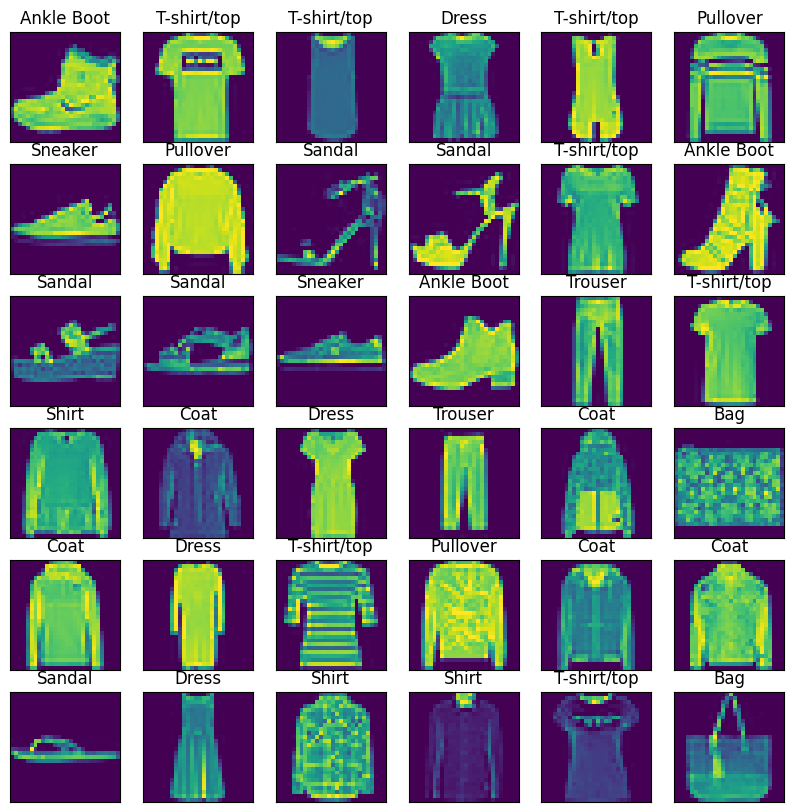

In [15]:
labels = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress',
          4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag',
          9:'Ankle Boot'}

plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape((IMG_ROWS, IMG_COLS)))
    label_index = train_labels[i]
    plt.title(labels[label_index])
plt.show()

In [16]:

train_labels = tf.keras.utils.to_categorical(train_labels, NUM_CLASSES)
test_labels = tf.keras.utils.to_categorical(test_labels, NUM_CLASSES)

In [17]:
# Already tried other optimizers
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │     1,180,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,803,274 (6.88 MB)

 Trainable params: 1,803,274 (6.88 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=VALIDATION_SPLIT)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 36s 91ms/step - accuracy: 0.7076 - loss: 0.7777 - val_accuracy: 0.8707 - val_loss: 0.3466
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 109ms/step - accuracy: 0.8826 - loss: 0.3203 - val_accuracy: 0.8842 - val_loss: 0.3116
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - accuracy: 0.9037 - loss: 0.2595 - val_accuracy: 0.9055 - val_loss: 0.2660
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 35s 94ms/step - accuracy: 0.9175 - loss: 0.2229 - val_accuracy: 0.9122 - val_loss: 0.2411
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 88ms/step - accuracy: 0.9273 - loss: 0.1977 - val_accuracy: 0.9053 - val_loss: 0.2555
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 31s 82ms/step - accuracy: 0.9356 - loss: 0.1771 - val_accuracy: 0.9184 - val_loss: 0.2291
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 78ms/step - accuracy: 0.9395 - loss: 0.1552 - val_accuracy: 0.9178 - val_loss: 0.2305
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 32s 86ms/step - accuracy: 0.9524 - loss: 0.1311 -

In [19]:
score = model.evaluate(test_images, test_labels)
print("Test score: {}".format(score[0]))
print("Test accuracy: {}".format(score[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9092 - loss: 0.6646
Test score: 0.6607827544212341
Test accuracy: 0.9128000140190125


Text(0.5, 1.0, 'Train - Accuracy')

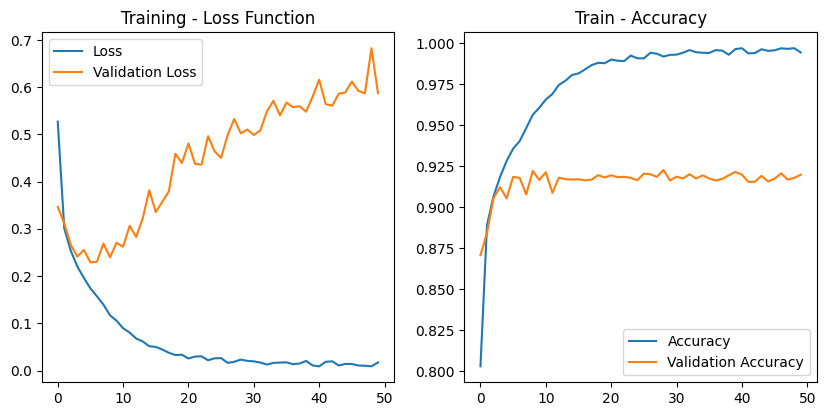

In [20]:
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [21]:
predicted_classes = np.around(model.predict(test_images))
predicted_classes = np.argmax(predicted_classes, axis=1)

test_labels = np.argmax(test_labels, axis=1)

correct = np.nonzero(predicted_classes == test_labels)[0]
incorrect = np.nonzero(predicted_classes != test_labels)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


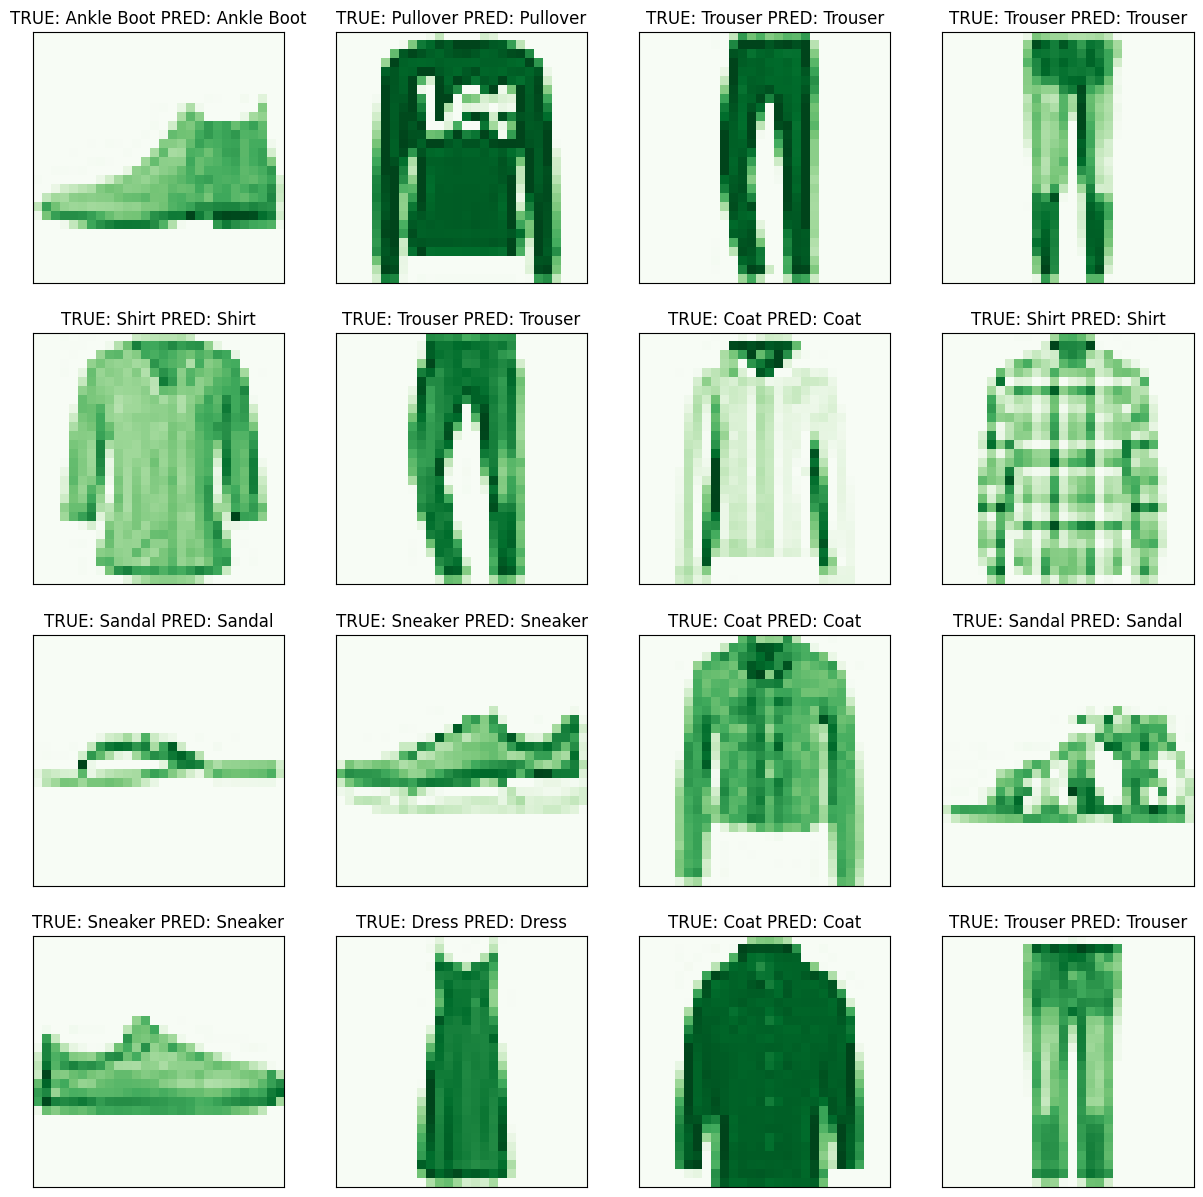

In [22]:
plt.figure(figsize=(15,15))

for i, index in enumerate(correct[:16]):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(test_images[index].reshape((IMG_ROWS, IMG_COLS)), cmap='Greens')
    label_index = test_labels[index]
    plt.title('TRUE: {} PRED: {}'.format(labels[test_labels[index]], labels[predicted_classes[index]]))

plt.show()